Principal Component Analysis (PCA) offers an effective way to reduce the dimensions of the data. This reduction of data allows for improved training speeds for machine learning and easier visualization of the data.

Since the number of dimensions are reduced, some information will be lost. However, in many cases this loss is acceptable. And in some cases, this loss can eliminate a portion of the noise in the training data.

PCA works by generating n vectors (where n is dimensionality of the data) along which the most variance is explained in decreasing order (the first vector explains the most variance, the second variance the second most, etc).

Below PCA has been applied to examine the iris data set.

#### Import relevant libraries

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

#### Load Data

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

df = pd.DataFrame(X,columns=iris.feature_names)
df['Label']=y
df['Species']=df['Label'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


#### Generate PCA df

PCA requires that the data be centered at 0, but sklearn does this automatically for us.

In [3]:
#Transform features
pca = PCA()
X_pca = pca.fit_transform(X)

#Merge with df
pca_df = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3','PC4'])
df = pd.merge(df, pca_df, right_index=True, left_index=True)

#### Examine variance explained by each Principal Component

In this case, nearly all of the variance (92.5%) is explained by PC1 alone.

In [4]:
print('Explained Variance Ratio')
for i in range(4):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Explained Variance Ratio
PC1: 0.9246162071742683
PC2: 0.053015567850535045
PC3: 0.017185139525006807
PC4: 0.005183085450189932


#### Visualize data in one dimension
This may incline us to visualize (and perhaps classify the data) via this first principle component alone. We can use PC1 to visualize the data in one dimension.

As you can see below, the setosa category can be entirely distinguished from the other two by this component. Although the other two species are mostly separable, they experience some significant overlap which could make classification difficult with PC1 alone.

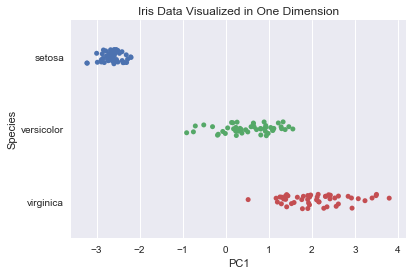

In [5]:
sns.stripplot(x="PC1", y="Species", data=df,jitter=True)
plt.title('Iris Data Visualized in One Dimension');

#### Explaining more variance

Perhaps we want to be sure that our model is explaining 95% of the variance (instead of our current 92%). If a variance threshold is known, but the number of desired components is not, then we can set the n_components parameter to the percentage we desire. When the number of components is known, the n_components parameter can instead be set to the number of principal components desired.

In [6]:
precent_of_variance_explained = .95

pca = PCA(n_components=precent_of_variance_explained)

pca_data = pca.fit_transform(X)

print("{} Principal Components are required to explain {} of the variation in this data.".format(pca.n_components_,precent_of_variance_explained))

2 Principal Components are required to explain 0.95 of the variation in this data.


#### Determing the right number of dimensions

We can attempt to confirm that two is a natural number of dimensions for our data by visualizing the relationship between the number of principal components and the variance explained.

The 'elbow' in the graph below (around dimensions = 2) can be thought of as indicating the natural dimensionality of the dataset.

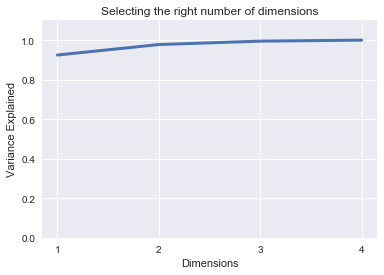

In [7]:
pca = PCA()
pca.fit(X)

cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.arange(len(cumsum))+1

plt.plot(dim,cumsum,'-',lw=3);

plt.xlabel('Dimensions')
plt.ylabel('Variance Explained')
plt.title('Selecting the right number of dimensions')

plt.xticks([1,2,3,4])
plt.ylim([0,1.1]);

#### Plotting the data in two dimensions
Thus we should consider plotting the data in two dimensions. As seen below, the data is nearly entireably separable with the first two principle components alone. Thus, we could now train a machine learning algorithm with two features instead of four and achieve reasonable results.

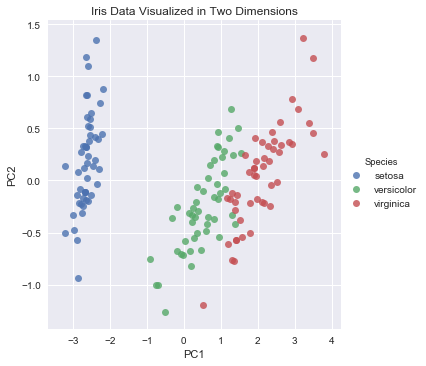

In [8]:
sns.lmplot('PC1','PC2',data=df,hue='Species',fit_reg=False)
plt.title('Iris Data Visualized in Two Dimensions');